In [1]:
import numpy as np
import matplotlib.pyplot as plt

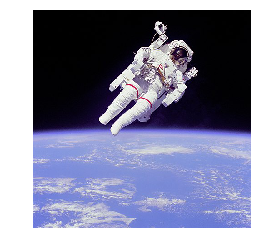

In [2]:
# Original image
image = plt.imread('data/480px-Astronaut-EVA.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

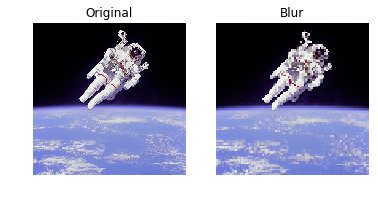

In [3]:
# Blur image effect

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

# Blur image
# By skipping 80% of the pixels
blur_image = image[::5, ::5]
plt.subplot(1, 2, 2)
plt.imshow(blur_image)
plt.axis('off')
plt.title('Blur')

plt.show()

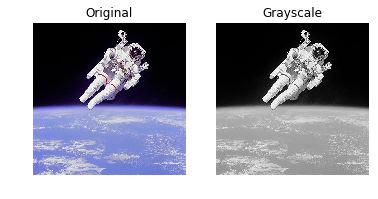

In [4]:
# Convert to grayscale

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

# Grayscale image
# The original image shape is (480, 480, 3)
# 480 * 480 for pixel and each pixel carries (red, green, blue) information
# To convert RGB to grayscale, simply sum it up to get the intensity
# Transform (480, 480, 3) to (480, 480) with intensity data
grayscale_image = image.sum(axis=2)
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale')

plt.show()

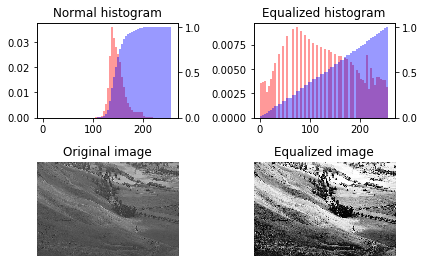

In [5]:
# Adjust image contrast
# Use another image for demo
image = plt.imread('data/800px-Unequalized_Hawkes_Bay_NZ.jpg')

# Get pixels
pixels = image.flatten()

# Get new pixels
# Apply interpolation using np.interp
# Transformation function maps from bin index to corresponding cdf values
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Get equalized image by reshaping pixels
equalized_image = new_pixels.reshape(image.shape)

# Normal histogram
plt.subplot(2, 2, 1)
plt.hist(pixels, bins=64, range=(0,256),
                normed=True,
               color='red', alpha=0.4)
plt.twinx()
plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.title('Normal histogram')

# Equalized histogram
plt.subplot(2, 2, 2)
plt.hist(new_pixels, bins=64, range=(0,256),
                normed=True,
               color='red', alpha=0.4)
plt.twinx()
plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.title('Equalized histogram')

# Original image
plt.subplot(2,2,3)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Equalized image
plt.subplot(2,2,4)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(equalized_image, cmap='gray')

plt.tight_layout()
plt.show()